Nathan McGinnis

WGU

# A Statistical View of Films 

We will explore a data set consisting of information on 10,866 films from year 1960 to 2015. Categories such as cost (budget), revenue, popularity, director, and length of film will be explored.

I will begin by importing the modules needed to perform the analysis in python

In [1]:
#importing all of the modules needed to make code run
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
from pylab import *
from sklearn import linear_model


# Data Wrangling

In [2]:
#importing csv file to analyze
mov=pd.read_csv('tmdb-movies.csv')

The .info() function can show us an overview of the dataset.  Here we can see the number of columns and headers associated with those columns.  There are 21 total columns, with 10866 entries.  There appears to be no null entries.  I have noticed many entries with a zero value.  Removing those values could be tricky. It would also deplete our dataset considerably. These entries show up in the budget and revenue columns and must be kept in mind when describing those catagories. 

In [3]:
#describing the dataset 
mov.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

# Exploratory Phase

A table starting from year 1960 showing the number of films made every year included in the dataset.

In [4]:
#creating variable based on year film was released
release_y=mov['release_year'].value_counts()
#sorting the list by year
release_lin=release_y.sort_index(axis=0)
release_lin


1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    490
2011    540
2012    588
2013    659
2014    700
2015    629
Name: release_year, dtype: int64

Plotting the number of films made every year in our database shows regular growth. There were a few down years along the way. The last year in our data set, 2015, has less films than the previous year, 2014.  The year 2014 having the most films in the data set. This may create an uneven view of the film industry since later years contain more data. This can result in the later years having a more robust statistical view.

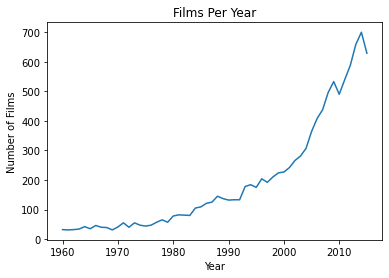

In [5]:
#plotting simple line chart 
release_lin.plot()
#creating labels for the chart
plt.title("Films Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Films")
plt.show()

Every movie has a production cost. Here is a statistcal summary of movie budgets over our dataset. The average cost to produce a movie was 17.5 million USD. The most expensive being 'The Warriors Way', produced in 2010 costing 425 million USD!

In [6]:
#summarizing the data for budget
mov[['budget']].describe()

,budget
count,1.086600e+04
mean,1.462570e+07
std,3.091321e+07
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.500000e+07
max,4.250000e+08


Here is a list of the top ten most expensive movies made. "The Warriors Way" at the top of the list at 425 billion USD.

In [7]:
#creating a list of the top ten films based on budget.
budg=mov.sort_values('budget',ascending=False)
budg.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,tt1032751,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/2010,74,6.4,2010,425000000.0,1.108757e+07
3375,1865,tt1298650,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,http://disney.go.com/pirates/index-on-stranger...,Rob Marshall,Live Forever Or Die Trying.,...,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/2011,3180,6.3,2011,368371256.2,9.904175e+08
7387,285,tt0449088,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,http://disney.go.com/disneypictures/pirates/,Gore Verbinski,"At the end of the world, the adventure begins.",...,"Captain Barbossa, long believed to be dead, ha...",169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/2007,2626,6.8,2007,315500574.8,1.010654e+09
14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,A New Age Has Come.,...,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/2015,4304,7.4,2015,257599886.7,1.292632e+09
6570,1452,tt0348150,1.957331,270000000,391081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,http://www.superman.com,Bryan Singer,NaN,...,"Set 5 years after the end of Superman II, the ...",154,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,6/28/2006,834,5.3,2006,292050672.7,4.230205e+08
4411,49529,tt0401729,1.588457,260000000,284139100,John Carter,Taylor Kitsch|Lynn Collins|Mark Strong|Willem ...,http://disney.go.com/johncarter/,Andrew Stanton,Lost in Our World. Found in Another.,...,Civil War vet John Carter is transplanted to M...,132,Action|Adventure|Fantasy|Science Fiction,Walt Disney Pictures,3/7/2012,1479,6.0,2012,246933513.2,2.698595e+08
1929,38757,tt0398286,2.865684,260000000,591794936,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,http://disney.go.com/disneypictures/tangled/,Nathan Greno|Byron Howard,They're taking adventure to new lengths.,...,When the kingdom's most wanted-and most charmi...,100,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,11/24/2010,2019,7.3,2010,260000000.0,5.917949e+08
7394,559,tt0413300,2.520912,258000000,890871626,Spider-Man 3,Tobey Maguire|Kirsten Dunst|James Franco|Thoma...,http://www.sonypictures.com/movies/spider-man3/,Sam Raimi,The battle within.,...,The seemingly invincible Spider-Man goes up ag...,139,Fantasy|Action|Adventure,Columbia Pictures|Laura Ziskin Productions|Mar...,5/1/2007,2083,5.8,2007,271330494.3,9.369017e+08
5508,57201,tt1210819,1.214510,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,http://disney.go.com/the-lone-ranger/,Gore Verbinski,Never Take Off the Mask,...,The Texas Rangers chase down a gang of outlaws...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,7/3/2013,1607,6.0,2013,238688504.9,8.357833e+07
4367,49051,tt0903624,4.218933,250000000,1017003568,The Hobbit: An Unexpected Journey,Ian McKellen|Martin Freeman|Richard Armitage|A...,http://www.thehobbit.com/,Peter Jackson,From the smallest beginnings come the greatest...,...,"Bilbo Baggins, a hobbit enjoying his quiet lif...",169,Adventure|Fantasy|Action,WingNut Films|New L

# Was it a hit?







Here is a statistical summary of movie revenue from our dataset. The highest grossing film brought in 2.78 billion USD. The average was 51.4 million USD.




In [8]:
#creating statistical summary of revenue
mov[['revenue']].describe()

,revenue
count,1.086600e+04
mean,3.982332e+07
std,1.170035e+08
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,2.400000e+07
max,2.781506e+09


Here is a list of the top five grossing films. Avatar takes the prize at 2.82 billion USD!

In [9]:
#creating a list of the top five revenue earning films
rev=mov.sort_values('revenue_adj',ascending=False)
rev.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/2009,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/1977,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/1997,4654,7.3,1997,2.716921e+08,2.506406e+09
10594,9552,tt0070047,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,http://theexorcist.warnerbros.com/,William Friedkin,Something almost beyond comprehension is happe...,...,12-year-old Regan MacNeil begins to adapt an e...,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,12/26/1973,1113,7.2,1973,3.928928e+07,2.167325e+09
9806,578,tt0073195,2.563191,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,...,An insatiable great white shark terrorizes the...,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,6/18/1975,1415,7.3,1975,2.836275e+07,1.907006e+09


The popularity of films shows the audience enthusiasm for the film. Popularity of films ranges from a max of 32.98 to 0.  The average popularity for a film is .64.

In [10]:
#creating a statistical summary of popularity score of films
mov[['popularity']].describe()

,popularity
count,10866.000000
mean,0.646441
std,1.000185
min,0.000065
25%,0.207583
50%,0.383856
75%,0.713817
max,32.985763


Here is the top five films based on popularity. The film Jurassic World topped the list with a popularity rating of 32.98.

In [11]:
#creating a list of the top five most popular films
popu=mov.sort_values('popularity',ascending=False)
popu.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
629,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,http://www.interstellarmovie.net/,Christopher Nolan,Mankind was born on Earth. It was never meant ...,...,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/2014,6498,8.0,2014,1.519800e+08,5.726906e+08
630,118340,tt2015381,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,http://marvel.com/guardians,James Gunn,All heroes start somewhere.,...,"Light years from Earth, 26 years after being a...",121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/2014,5612,7.9,2014,1.565855e+08,7.122911e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
631,100402,tt1843866,12.971027,170000000,714766572,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,http://www.captainamericathewintersoldiermovie...,Joe Russo|Anthony Russo,In heroes we trust.,...,After the cataclysmic events in New York with ...,136,Action|Adventure|Science Fiction,Marvel Studios,3/20/2014,3848,7.6,2014,1.565855e+08,6.583651e+08
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/1977,4428,7.9,1977,3.957559e+07,2.789712e+09
632,245891,tt2911666,11.422751,20000000,78739897,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,http://www.johnwickthemovie.com/,Chad Stahelski|David Leitch,Don't set him off.,...,"After the sudden death of his beloved wife, Jo...",101,Action|Thriller,Thunder Road Pictures|Warner Bros.|87Eleven|De...,10/22/2014,2712,7.0,2014,1.842182e+07,7.252661e+07
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
633,131631,tt1951265,10.739009,125000000,752100229,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,http://www.thehungergames.movie/,Francis Lawrence,Fire burns brighter in the darkness,...,Katniss Everdeen reluctantly becomes the symbo...,12

# Does popularity of a film mean more revenue? 

Looking at the relationship between popularity and revenue produces a fair linear relationship between the two variables.  A film having more popularity may lead to more revenue but the "fitness" of the regression is not very strong.  The top three most popular films were not the top three highest grossing films.

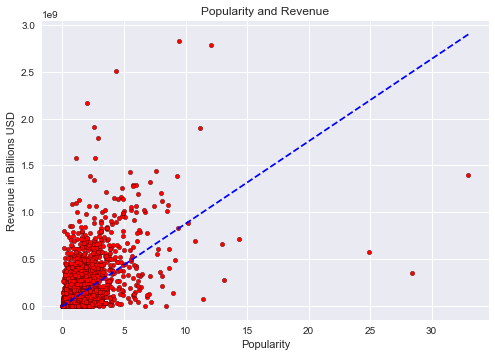

In [12]:
#creating a scatter plot of popularity and revenue
#assigning variables
reve=mov['revenue_adj']
popular=mov['popularity']
plt.style.use('seaborn')
#making plot
plt.scatter(popular,reve,s=20,c='red',edgecolor='black')
#creating linear model
z = np.polyfit(popular, reve, 1)
p = np.poly1d(z)
#plot linear model
plot(popular,p(popular),"b--")
#creating labels and title for graph
plt.title("Popularity and Revenue")
plt.xlabel("Popularity")
plt.ylabel("Revenue in Billions USD")
plt.show()


Looking for some direction in your life? You may want to call Steven Spielberg.  As a director his films have produced 10 billion USD in revenue. Putting him at the top of all-time list for revenue earned. The following list contains many recognizable names. 

In [13]:
#group by director, then revenue adjusted
director_sum=mov.groupby('director')['revenue_adj'].sum()
#sum the values for each director
director_crown=director_sum.sort_values(ascending=False)
#show top ten results
director_crown.head(10)


director
Steven Spielberg    1.520245e+10
James Cameron       7.327221e+09
Peter Jackson       7.019848e+09
George Lucas        6.313919e+09
Robert Zemeckis     5.655648e+09
Michael Bay         5.460672e+09
Chris Columbus      5.094077e+09
Tim Burton          4.529285e+09
Ron Howard          4.527095e+09
Ridley Scott        4.219566e+09
Name: revenue_adj, dtype: float64

Although the seats in modern cinemas are confortable compared to their ancestors, you may need to get up and take a break watching the longest film in our dataset. A statistical summary of runtime shows us a few key statistics about the runtime of movies. The average movie ran for 102 minutes. The longest film ran for 900 minutes! That's a lot of trips to the concession stand.

In [14]:
#statistical summary of runtime for films
mov[['runtime']].describe()

,runtime
count,10866.000000
mean,102.070863
std,31.381405
min,0.000000
25%,90.000000
50%,99.000000
75%,111.000000
max,900.000000


A histogram of runtimes for movies. A dense histogram with a few outliers. The furthest one right is at 900.

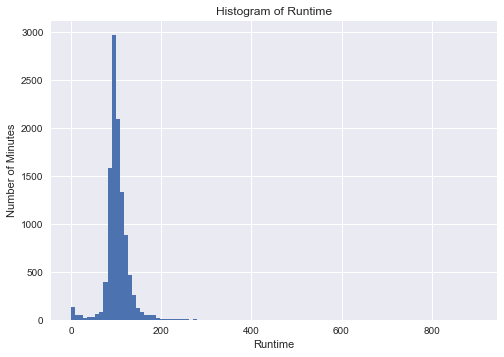

In [15]:
#building a histogram for runtime of movies
mov.hist(column='runtime',bins=100)
#adding labels and title
plt.title("Histogram of Runtime")
plt.xlabel("Runtime")
plt.ylabel("Number of Minutes")
plt.show()


Listing the top five films for the longest runtime, we find several documenataries, as we might imagine. The Story of Film: An Odyssey, takes the first place position at 900 minutes of runtime (that's a serious binge watch).

In [16]:
#creating list of top five longest runtime films
run_t=mov.sort_values('runtime',ascending=False)
run_t.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/2011,14,9.2,2011,0.0,0.0
4041,150004,tt0289830,0.469332,0,0,Taken,Dakota Fanning|Matt Frewer|Eric Close|Emily Be...,NaN,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,Some secrets we keep. Some are kept from us,...,"Taken spans five decades and four generations,...",877,Science Fiction,DreamWorks,12/2/2002,38,6.8,2002,0.0,0.0
2722,331214,tt0185906,0.537593,0,125000000,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,http://www.hbo.com/band-of-brothers,Phil Alden Robinson|Richard Loncraine|Mikael S...,Ordinary men. Extraordinary times.,...,Drawn from interviews with survivors of Easy C...,705,Action|Drama|War,HBO,9/9/2001,313,8.0,2001,0.0,153936014.6
6176,42044,tt0090015,0.147489,0,0,Shoah,Simon Srebnik|Michael Podchlebnik|Motke Zaidl,NaN,Claude Lanzmann,NaN,...,Claude Lanzmann directed this 9 1/2 hour docum...,566,Documentary,British Broadcasting Corporation (BBC)|MinistÃ...,11/1/1985,16,8.3,1985,0.0,0.0
6181,18729,tt0088583,0.000065,0,0,"North and South, Book I",Patrick Swayze|Philip Casnoff|Kirstie Alley|Ge...,NaN,NaN,NaN,...,"Two friends, one northern and one southern, st...",561,Drama|History|Western,NaN,11/3/1985,17,6.0,1985,0.0,0.0


The top ten films based on runtime with IMBD ID

In [17]:
#group by IMBD ID, then runtime
runtime_sum=mov.groupby('imdb_id')['runtime'].sum()
#sum the values for each ID
runtime_crown=runtime_sum.sort_values(ascending=False)
#show top ten results
runtime_crown.head(20)


imdb_id
tt2044056    900
tt0289830    877
tt0185906    705
tt0090015    566
tt0088583    561
tt0795176    550
tt0374463    540
tt0472027    501
tt1533395    500
tt0995832    470
tt1453159    421
tt0207275    417
tt2396421    400
tt0296310    400
tt1878805    389
tt0096639    372
tt0108941    366
tt0388644    360
tt2167393    360
tt0318997    352
Name: runtime, dtype: int64

# Conclusion

A few considerations must be made when reflecting on this dataset.  As time has progressed more films were recorded in the dataset every year. This makes the information viewed from this dataset to be uneven when thinking about films statistics from year to year and especially from decade to decade.  Later years containing more data will give a more robust view of the film industry. A number of entries with zero values in the budget and revenue catagories make it more difficult to say with great conviction what the statistics are baring. Film studios also have accounting practices which may skew these catagories. Films with financial losses will be written off as tax losses against films that made a profit. This changes how film financial statements are recorded. It makes these catagories less reliable, but they still may be useful from some points of view. 